# Survey results visualization


Running this notebook requires,
  * Python 3
  * numpy, pandas, xlrd, scikit-learn >0.18, matplotlib
  * The original survey data in .xls format

In [118]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('font', family='Arial')

%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.precision = 2

## 1. Loading and pre-processing of the data

In [86]:
# Load a lime surveys file with raw results
df = pd.read_excel('results-survey15822 (4).xls', header=0)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [87]:
from IPython.display import display

# normalize numeric questions in [1, 5] to [0, 1]
df.iloc[:, 55:63] /= 5.0
# remove empty columns or those with text
df.drop(df.columns[[0, 1, 2, 3, 4, 19, 28, 31, 37, 45, 54, 63, 64, 65, 66, 67, 69]], axis=1, inplace=True)
df.set_index(df.columns[-1], inplace=True)
df.replace(['Да', 'Так'], 1.0, inplace=True)
df.replace(['Нет', 'Ні'], 0., inplace=True)
df

,[Будь-який роботодавець для наших випускників] 1. Хто є партнерами для вашої організації з зовнішнього середовища? (не більше 3-х відповідей),"[Головним чином – це різноманітні вендори, інтегратори та підприємства ] 1. Хто є партнерами для вашої організації з зовнішнього середовища? (не більше 3-х відповідей)",[Це промислові підприємства з нашого сектору (галузі чи-та регіону)] 1. Хто є партнерами для вашої організації з зовнішнього середовища? (не більше 3-х відповідей),"[В основному, це інші ВНЗ] 1. Хто є партнерами для вашої організації з зовнішнього середовища? (не більше 3-х відповідей)","[Це різні організації включно з державними органами, бізнес-асоціаціями тощо] 1. Хто є партнерами для вашої організації з зовнішнього середовища? (не більше 3-х відповідей)",[Важко сказати] 1. Хто є партнерами для вашої організації з зовнішнього середовища? (не більше 3-х відповідей),"[Мабуть, немає підприємств, яких можна назвати «партнерами»] 1. Хто є партнерами для вашої організації з зовнішнього середовища? (не більше 3-х відповідей)",[Працевлаштування наших випускників] 2. Що є предметом партнерства у вашій організації? (не більше 3-х відповідей),"[Інновації - нові розробки, що потребує ринок] 2. Що є предметом партнерства у вашій організації? (не більше 3-х відповідей)",[Наукова діяльність] 2. Що є предметом партнерства у вашій організації? (не більше 3-х відповідей),[Навчальні курси та тренінги для дорослих спеціалістів] 2. Що є предметом партнерства у вашій організації? (не більше 3-х відповідей),[Зміни та покращення навчально-методичних практик] 2. Що є предметом партнерства у вашій організації? (не більше 3-х відповідей),[Написання та виконання грантів] 2. Що є предметом партнерства у вашій організації? (не більше 3-х відповідей),[Дослідження ринку] 2. Що є предметом партнерства у вашій організації? (не більше 3-х відповідей),3. Чи є в вашій організації фокус на розвитку мережі партнерів?,[Працевлаштування наших випускників] 4. B якому напрямку ви шукаєте партнерів?,"[Інновації - нові розробки, що потребує ринок] 4. B якому напрямку ви шукаєте партнерів?",[Наукова діяльність] 4. B якому напрямку ви шукаєте партнерів?,[Навчальні курси та тренінги для дорослих спеціалістів] 4. B якому напрямку ви шукаєте партнерів?,[Зміни та покращення навчально-методичних практик] 4. B якому напрямку ви шукаєте партнерів?,[Написання та виконання грантів] 4. B якому напрямку ви шукаєте партнерів?,[Дослідження ринку] 4. B якому напрямку ви шукаєте партнерів?,5. Чи є у вас будь-які формалізовані та задокументовані правила (регламенти) щодо побудови партнерської мережі?,6. Чи є вас фокус на розумінні та задоволенні потреб партнерів?,"[Як заклад, що готує молодих спеціалістів на високому рівні якості] 8. Як ви позиціонуєтесь по відношенню до партнерів в вашому оточенні (екосистемі)? (не більше 3-х відповідей)",[Як сучасний центр розробок та інновацій] 8. Як ви позиціонуєтесь по відношенню до партнерів в вашому оточенні (екосистемі)? (не більше 3-х відповідей),[Як додатковий інженерний ресурс для будь-яких робіт] 8. Як ви позиціонуєтесь по відношенню до партнерів в вашому оточенні (екосистемі)? (не більше 3-х відповідей),[Як тренінговий (навчально-методичний) центр підготовки та перепідготовки кадрів ] 8. Як ви позиціонуєтесь по відношенню до партнерів в вашому оточенні (екосистемі)? (не більше 3-х відповідей),[Ніяк – в нас немає позиціонування] 8. Як ви позиціонуєтесь по відношенню до партнерів в вашому оточенні (екосистемі)? (не більше 3-х відповідей),[Відбір та пропозиція кращих студентів та молодих спеціалістів] 9. Які послуги ви вже надаєте своїм партнерам?,[Кваліфікований ресурс та команди для нових розробок ] 9. Які послуги ви вже надаєте своїм партнерам?,"[Якісний просвітній та освітній контент, що потрібний для розвитку ринку] 9. Які послуги ви вже надаєте своїм партнерам?",[Експертизу інженерних проектів та-чи нових розробок] 9. Які послуги ви вже надаєте своїм партнерам?,[Сприяння в проведенні маркетингових та піар заходів] 9. Які послуги 

## 2. Visualizing differences between respondents

To evaluate the global differences between repondents, we will treat each response row as a vector, and compute the Euclidean distances to all other rows. Lower distance means that results are more similar.

Sometimes there are two reponses from the same instituion, if they are consistent the distance between them should be low.

In [93]:
from sklearn.metrics.pairwise import pairwise_distances

df_dist = pd.DataFrame(pairwise_distances(df.values),
                       columns=df.index.values,
                       index=df.index.values)
df_dist

,ДонНТУ,Вінницький національний технічний університет,ЗНТУ,хаи,Хмельницький національний університет,ВНТУ,Центральноукраїнський національний технічний університет,Криворізький національний університет,Нац.аерокосм.ун-т ХАI,Тернопільський національний технічний університет імені Івана Пулюя,ІФНТУНГ,ІФНТУНГ,ОНПУ,ЛДУБЖД,ОНАХТ,Сумський державний університет,ДонНТУ,ХНУРЕ,ДНУЗТ,КПІ ім. Ігоря Сікорського,"НУ ""ОМА""",НТУУ КПІ,ІАСУ НУХТ,"НТУУ ""КПІ ім.І.Сікорського""",СУМСЬКИЙ ДЕРЖАВНИЙ УНІВЕРСИТЕТ,КПІ ім. Ігоря Сікорського,Львівська політехніка
ДонНТУ,0.00,4.40,4.50,4.22,4.27,4.43,4.53,3.66,4.42,4.41,4.19,4.41,4.16,3.64,4.80,5.04,4.15,4.57,3.70,4.16,3.76,4.04,4.08,4.33,3.97,4.04,4.77
Вінницький національний технічний університет,4.40,0.00,2.73,3.88,4.23,4.07,4.47,4.31,4.10,3.84,4.36,3.79,4.02,4.28,4.55,4.79,4.33,3.79,4.64,3.56,3.65,3.69,4.48,4.00,3.87,3.98,2.83
ЗНТУ,4.50,2.73,0.00,4.04,3.83,4.19,4.54,4.18,4.46,4.01,4.00,3.68,3.65,4.16,4.17,4.65,4.19,3.58,4.69,3.33,3.22,3.26,4.33,3.84,3.53,4.06,2.93
хаи,4.22,3.88,4.04,0.00,3.92,4.09,4.89,4.10,3.39,3.56,3.72,4.14,4.41,4.76,3.96,3.75,4.10,3.99,4.08,3.69,3.70,4.23,4.22,4.04,2.66,4.02,4.36
Хмельницький національний університет,4.27,4.23,3.83,3.92,0.00,4.38,4.46,4.57,3.87,4.35,3.50,3.88,3.96,3.88,4.54,3.92,4.35,4.50,4.37,4.00,3.72,3.85,4.39,3.95,3.85,4.41,3.77
ВНТУ,4.43,4.07,4.19,4.09,4.38,0.00,4.64,3.51,4.33,3.84,3.74,4.75,3.85,4.93,3.94,4.66,3.86,3.98,4.35,4.10,3.92,3.68,4.47,4.22,4.38,3.42,4.01
Центральноукраїнський національний технічний університет,4.53,4.47,4.54,4.89,4.46,4.64,0.00,5.60,4.45,5.27,4.78,4.40,5.11,4.66,4.87,4.76,4.87,4.73,4.84,5.10,4.74,4.74,4.95,4.52,5.14,5.32,4.55
Криворізький національний університет,3.66,4.31,4.18,4.10,4.57,3.51,5.60,0.00,4.80,3.52,4.05,4.74,3.84,4.52,4.15,4.89,3.23,4.44,3.82,3.85,3.92,3.68,3.97,4.44,3.90,3.05,4.46
Нац.аерокосм.ун-т ХАI,4.42,4.10,4.46,3.39,3.87,4.33,4.45,4.80,0.00,4.79,4.01,4.30,4.55,4.75,4.66,3.48,4.58,4.52,4.18,4.34,3.91,4.45,4.07,3.97,4.06,4.65,4.46
Тернопільський національний технічний університет імені Івана Пулюя,4.41,3.84,4.01,3.56,4.35,3.84,5.27,3.52,4.79,0.00,3.50,4.10,4.14,4.97,3.93,4.49,4.07,4.28,4.35,3.36,3.94,3.10,3.76,4.03,2.98,2.37,3.57


Now project the data to 2 dimenstions, using Principal Component Analysis (PCA) so that the results can be visualized. PCA does not preserve distances.

In [135]:
from sklearn.decomposition import PCA

proj = PCA(n_components=2)
df_proj = pd.DataFrame(proj.fit_transform(df.values),
                       index=df.index)
df_proj['index'] = np.arange(len(df_proj.index))
df_proj

,0,1,index
"[Ваш заклад] 14. Для отримання зворотнього зв’язку та фінального звіту, вкажіть будь-ласка ваші координати",,,
ДонНТУ,0.21,0.92,0
Вінницький національний технічний університет,-0.08,-1.86,1
ЗНТУ,-0.19,-1.92,2
хаи,0.16,0.61,3
Хмельницький національний університет,1.12,-0.26,4
ВНТУ,-0.87,0.24,5
Центральноукраїнський національний технічний університет,2.30,-0.88,6
Криворізький національний університет,-1.72,1.23,7
Нац.аерокосм.ун-т ХАI,1.61,0.53,8


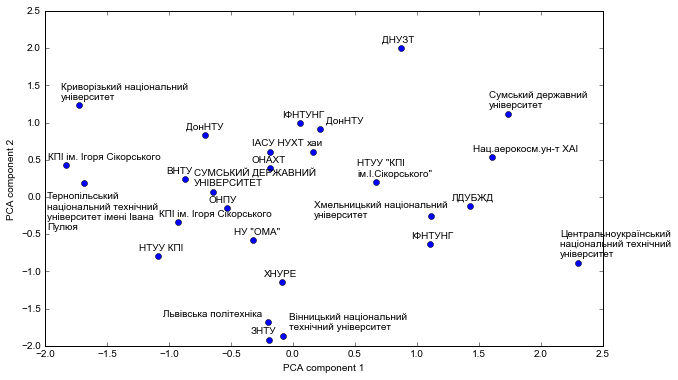

In [160]:
from textwrap import fill


fig = plt.figure(figsize=(10, 6))
ax = plt.subplot()

offset_x = {26: -0.7,
            1: +0.2,
            4: -0.8,
            0: +0.2,
            9: -0.15,
            3: +0.1}
offset_y = {4: -0.1,
            9: -0.7}

ax.plot(df_proj.values[:, 0], df_proj.values[:, 1], 'o')
for idx, label in enumerate(df_proj.index.values):
    # insert newline every 
    label = fill(label, 25, break_long_words=False)
    x = df_proj.values[idx, 0] - 0.15 + offset_x.get(idx, 0)
    y = df_proj.values[idx, 1] + 0.08 + offset_y.get(idx, 0)
    ax.text(x, y, label)
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2')